# [`ultralytics_api`](../vancouver_watching/ai/classes.py) Inference Sandbox

model: https://hub.ultralytics.com/models/R6nMlK6kQjSsQ76MPqQM?tab=preview

In [ ]:
import sys
sys.path.append("../")

from bluer_sandbox import notebooks

from IPython.display import Image
import matplotlib.pyplot as plt

from bluer_options import string
from bluer_objects import file
from bluer_objects import objects

from bluer_sandbox.host import signature
from vancouver_watching.ai.ultralytics import Ultralytics_API
from vancouver_watching.logger import logger

logger.info(f"{'.'.join(signature())},\nbuilt on {string.pretty_date()}")

🌈  vancouver_watching-3.457.1, built on 05 January 2025, 18:28:21


In [4]:
object_name = "2024-02-02-18-26-13-21057"
filename = "georgiaE.jpg"

object_path = objects.object_path(object_name)

In [5]:
assert objects.download(object_name, filename)

download: s3://kamangir/bolt/2024-02-02-18-26-13-21057/georgiaE.jpg to ../../../storage/abcli/2024-02-02-18-26-13-21057/georgiaE.jpg


---

In [6]:
# https://hub.ultralytics.com/models/<model-id>?tab=preview

model_id = "R6nMlK6kQjSsQ76MPqQM" # default, YOLOv8x (heaviest)

# model_id = "1xKPEuwRoyDdwL6uamBI" # YOLOv8n (lightest)

In [7]:
ultralytics_api = Ultralytics_API(model_id=model_id)

🌈  Ultralytics_API.url: https://api.ultralytics.com/v1/predict/R6nMlK6kQjSsQ76MPqQM


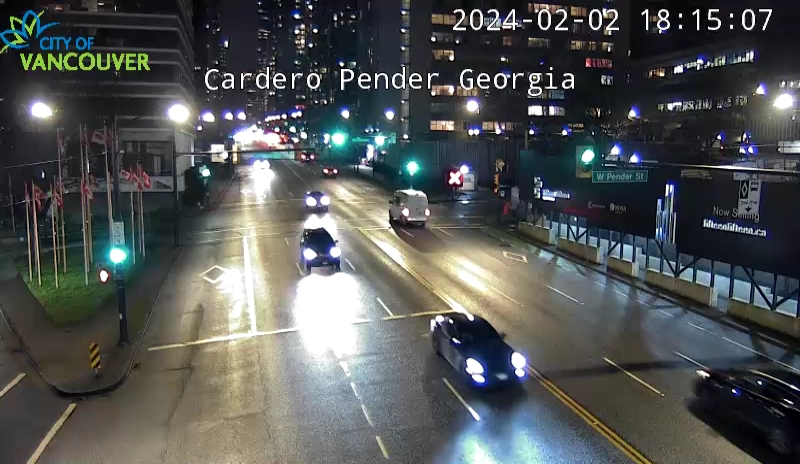

In [8]:
image_filename = os.path.join(object_path, filename)
Image(image_filename)

In [9]:
success, response_dict = ultralytics_api.infer(image_filename)
assert success
# response_dict

🌈  Ultralytics_API.infer(/Users/kamangir/storage/abcli/2024-02-02-18-26-13-21057/georgiaE.jpg)
🌈  car: 6, traffic light: 1
🌀  blue_objects.file.save.save_image: 498x800x3:uint8 -> /Users/kamangir/storage/abcli/2024-02-02-18-26-13-21057/georgiaE-inference.jpg


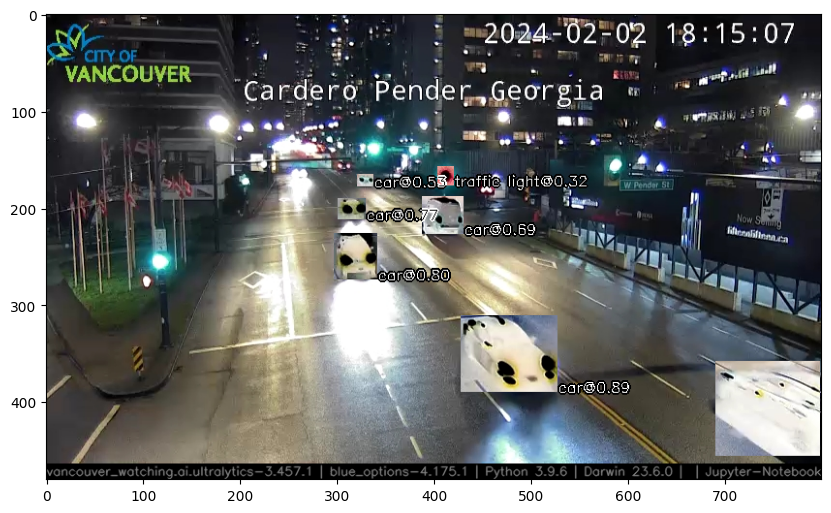

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(ultralytics_api.render(
    file.load_image(image_filename)[1].copy(),
    response_dict
))
plt.show()

---

In [11]:
assert objects.upload(object_name)

upload: ../../../storage/abcli/2024-02-02-18-26-13-21057/georgiaE-inference.jpg to s3://kamangir/bolt/2024-02-02-18-26-13-21057/georgiaE-inference.jpg


In [12]:
# END